## Questions
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Who reported watching more TV in 2012, men or women?

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [6]:
import os
os.chdir('C:\\Users\\M246047\\Documents\\Python')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings(action="ignore")

In [8]:
ess = pd.read_csv('ESSdata.csv')
print(ess.info())
ess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 839.3+ KB
None


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [9]:
# ess[(ess['year'] == 6) & (ess['cntry'] == 'ES')]

In [10]:
null_columns = ess.columns[ess.isnull().any()]
ess[null_columns].isnull().sum()

tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [11]:
ess.fillna(ess.mean(), inplace = True)
null_columns = ess.columns[ess.isnull().any()]
ess[null_columns].isnull().sum()

Series([], dtype: float64)

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [41]:
# Creating dataframes for each country
es = ess[ess['cntry'] == 'ES'].sort_values(by=['year'])
se = ess[ess['cntry'] == 'SE'].sort_values(by=['year'])
ch = ess[ess['cntry'] == 'CH'].sort_values(by=['year']) 
no = ess[ess['cntry'] == 'NO'].sort_values(by=['year'])
cz = ess[ess['cntry'] == 'CZ'].sort_values(by=['year'])
de = ess[ess['cntry'] == 'DE'].sort_values(by=['year'])

# Creating lists of each country's trust values
es_trust = np.array(es.ppltrst)
se_trust = np.array(se.ppltrst)
ch_trust = np.array(ch.ppltrst)
no_trust = np.array(no.ppltrst)
cz_trust = np.array(cz.ppltrst)
de_trust = np.array(de.ppltrst)



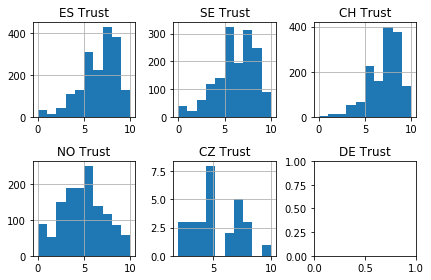

In [13]:
# Looking at the distribution to decide which comparison test to use.
es_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 1)
plt.title('ES Trust')

se_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)

plt.subplot(2, 3, 2)
plt.title('SE Trust')

ch_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 3)
plt.title('CH Trust')

no_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 4)
plt.title('NO Trust')

cz_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 5)
plt.title('CZ Trust')

de_trust.hist()
plt.tight_layout(pad=1.08, h_pad=None)
plt.subplot(2, 3, 6)
plt.title('DE Trust')
plt.show()

# de_trust.hist()
# plt.title('DE Trust')
# plt.show()

Apparently these distributions are normal enough that I can use an ANOVA to compare the groups. 

In [48]:
print('Spain Trust Average')
stats.f_oneway(es_trust, se_trust, ch_trust, no_trust, cz_trust, de_trust)

def trust(df):
    df_2012 = df[df['year'] == 6] 
#     print(df_2012.head())
    df_2012 = df_2012[['ppltrst']]
#     print(df_2012.head())
    df_2012_length = len(df_2012)
#     print(df_2012_length)
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[['ppltrst']]
    
    print('Average trust for 2012: ', df_2012.mean())
    print('Average trust for 2014: ', df_2014.mean())
    print(stats.f_oneway(df_2012, df_2014))

Spain Trust Average


In [50]:
print('Stats for Spain Trust: \n')
trust(es)

print('\n Stats for Sweden Trust: \n')
trust(se)

print('Stats for Switzerland Trust: \n')
trust(ch)

print('Stats for Norway Trust: \n')
trust(no)

print('Stats for Czech Republic Trust: \n')
trust(cz)

print('Stats for Germany Trust: \n')
trust(de)

Stats for Spain Trust: 

Average trust for 2012:  ppltrst    5.114592
dtype: float64
Average trust for 2014:  ppltrst    4.896224
dtype: float64
F_onewayResult(statistic=array([6.16912366]), pvalue=array([0.013067]))

 Stats for Sweden Trust: 

Average trust for 2012:  ppltrst    6.057401
dtype: float64
Average trust for 2014:  ppltrst    6.257709
dtype: float64
F_onewayResult(statistic=array([4.4223186]), pvalue=array([0.03560925]))
Stats for Switzerland Trust: 

Average trust for 2012:  ppltrst    5.677878
dtype: float64
Average trust for 2014:  ppltrst    5.751617
dtype: float64
F_onewayResult(statistic=array([0.46005244]), pvalue=array([0.4977011]))
Stats for Norway Trust: 

Average trust for 2012:  ppltrst    6.647825
dtype: float64
Average trust for 2014:  ppltrst    6.597209
dtype: float64
F_onewayResult(statistic=array([0.29553846]), pvalue=array([0.58677601]))
Stats for Czech Republic Trust: 

Average trust for 2012:  ppltrst    4.375257
dtype: float64
Average trust for 2014: 

For the most part, there's no significant difference. Spain had a decrease in trust whereas Sweden had an increase, but no other countries had significant changes.

## 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.



In [100]:
# Creating lists of each country's trust values
es_happy = es.happy
se_happy = se.happy
ch_happy = ch.happy
no_happy = no.happy
cz_happy = cz.happy
de_happy = de.happy

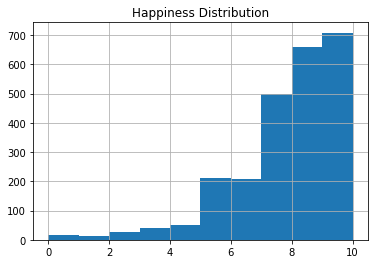

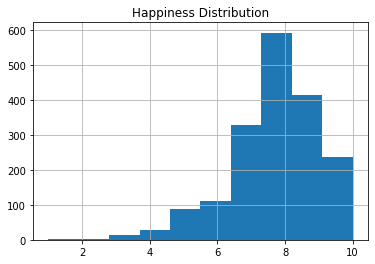

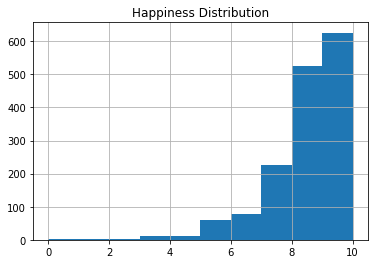

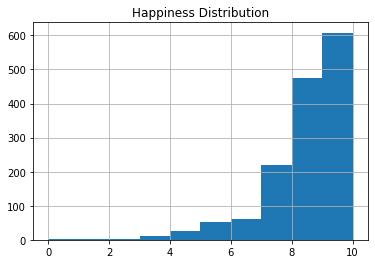

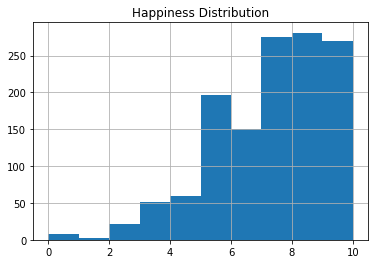

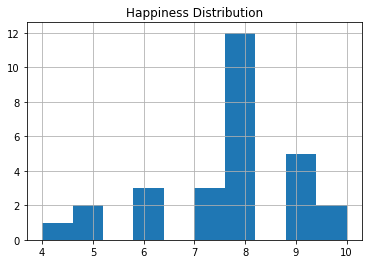

In [101]:
# Looking at the distribution to decide which comparison test to use.
for df in [es_happy, se_happy, ch_happy, no_happy, cz_happy, de_happy]:
    df.hist()
    plt.title('Happiness Distribution')
    plt.show()
    print('\n')



The distributions are mostly skewed to the left and do not appear to have mathematical properties, so I will use the Kruskal-Wallis test. 

In [20]:
def rank_kruskal_comparison_test(df, column_of_interest):
#     print(df.head())
#     print(df.info())
    df_2012 = df[df['year'] == 6] 
#     print(df_2012.head())
    df_2012 = df_2012[[column_of_interest]]
#     print(df_2012.head())
    df_2012_length = len(df_2012)
#     print(df_2012_length)
    df_2014 = df[df['year'] == 7]
    df_2014 = df_2014[[column_of_interest]]
#     print(df_2014.head())
    df_2014_length = len(df_2014)
#     print(df_2014_length)
    ranks = stats.rankdata(df_2012 + df_2014)
#     print('Ranks:', ranks[:10])
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['Ranks_2012'] = ranks[0:df_2012_length]

    new_df['Ranks_2014'] = ranks[df_2012_length:]
    print(new_df.head())
                       
    # Average rank per group.
    groups = ['Ranks_2012', 'Ranks_2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
    print(np.mean(ranks))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['Ranks_2012'],
        new_df['Ranks_2014']))

I'll use the Kruskal-Wallis test as there are more than two groups with abnormal distributions, and while it's possible that all participants participated in both versions (each year), the data is not formatted in a way to allow us to confirm.

In [102]:
# As the distributions do not appear to have known mathematical properties, I'll use the Kruskal-Wallis test.

def no_rank_kruskal_comparison_test(df, column_of_interest):
    df_2012 = df[df['year'] == 6] # dataframe of just year 2012
    df_2012 = df_2012[[column_of_interest]] # dataframe of column of interest in 2012
    list_2012 = df_2012[column_of_interest].tolist() # converting column of interest to list

    print(type(list_2012), list_2012[:5])
    df_2014 = df[df['year'] == 7] # dataframe of just year 2014
    df_2014 = df_2014[[column_of_interest]] # dataframe of column of interest in 2014
    list_2014 = df_2014[column_of_interest].tolist() # converting column of interest to list
    print(df_2014.head())

    
    
    # Create a new dataframe of ranks
    new_df = pd.DataFrame()
    new_df['2012'] = list_2012
    new_df['2014'] = list_2014
    print('\n New DataFrame Head: \n', new_df.head())
                       
    # Average rank per group.
    groups = ['2012', '2014']
    print(new_df[groups].apply(np.mean))

    # Overall average rank.
#    print(np.mean(groups))

    # Print the test statistic followed by the probability of getting this result
    # if the groups were not different.
    print(stats.kruskal(
        new_df['2012'],
        new_df['2014']))

In [103]:
print('Happy Comparison test for ES')
no_rank_kruskal_comparison_test(es, 'happy')

print('\n')

print('Trust Comparison test for ES')
no_rank_kruskal_comparison_test(es, 'ppltrst')

Happy Comparison test for ES
<class 'list'> [9.0, 7.0, 9.0, 10.0, 6.0]
      happy
4910    6.0
4914    8.0
4913    9.0
4912   10.0
4911   10.0

 New DataFrame Head: 
    2012  2014
0   9.0   6.0
1   7.0   8.0
2   9.0   9.0
3  10.0  10.0
4   6.0  10.0
2012    7.548800
2014    7.420193
dtype: float64
KruskalResult(statistic=4.086118020109992, pvalue=0.043236838117116295)


Trust Comparison test for ES
<class 'list'> [3.0, 3.0, 3.0, 5.0, 4.0]
      ppltrst
4910      1.0
4914      1.0
4913      8.0
4912      8.0
4911      7.0

 New DataFrame Head: 
    2012  2014
0   3.0   1.0
1   3.0   1.0
2   3.0   8.0
3   5.0   8.0
4   4.0   7.0
2012    5.114592
2014    4.896224
dtype: float64
KruskalResult(statistic=8.149961651374431, pvalue=0.004306207168095373)


In [22]:
print('Comparison test for ES')
rank_kruskal_comparison_test(es, 'happy')
print('\n Comparison test for SE')
rank_kruskal_comparison_test(se, 'happy')
print('\n Comparison test for CH')
rank_kruskal_comparison_test(ch, 'happy')
print('\n Comparison test for NO')
rank_kruskal_comparison_test(no, 'happy')
print('\n Comparison test for CZ')
rank_kruskal_comparison_test(cz, 'happy')
print('\n Comparison test for DE')
rank_kruskal_comparison_test(de, 'happy')

Comparison test for ES
   Ranks_2012  Ranks_2014
0         1.0      1212.0
1      1613.0      1060.0
2      1614.0       399.0
3      1615.0       400.0
4      1616.0       401.0
Ranks_2012    1817.501237
Ranks_2014     609.498763
dtype: float64
1213.5
KruskalResult(statistic=1803.7947778418402, pvalue=0.0)

 Comparison test for SE
   Ranks_2012  Ranks_2014
0         1.0       907.0
1      1216.0       453.0
2      1215.0       308.0
3      1214.0       307.0
4      1213.0       306.0
Ranks_2012    1359.626652
Ranks_2014     457.373348
dtype: float64
908.5
KruskalResult(statistic=1344.0743387704806, pvalue=2.987938124745757e-294)

 Comparison test for CH
   Ranks_2012  Ranks_2014
0         1.0       772.0
1      1035.0       675.0
2      1034.0       262.0
3      1033.0       261.0
4      1032.0       260.0
Ranks_2012    1157.50194
Ranks_2014     389.49806
dtype: float64
773.5
KruskalResult(statistic=1143.820222117447, pvalue=9.885006003713769e-251)

 Comparison test for NO
   Ranks_20

## 3. Who reported watching more TV in 2012, men or women?

In [105]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [106]:
women = ess[ess['gndr'] == 2].dropna(how='all')
women_2012 = women[women['year'] == 6]
women_2012_tv = women_2012[['tvtot']]

men = ess[ess['gndr'] == 1].dropna(how='all')
men_2012 = men[men['year'] == 6]
men_2012_tv = men_2012[['tvtot']]

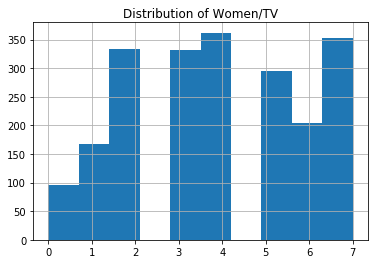

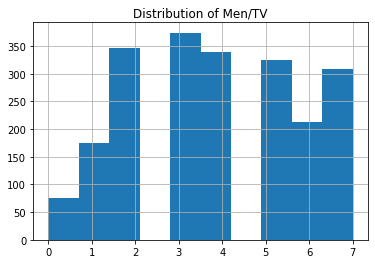

In [107]:
women_2012_tv.hist()
plt.title('Distribution of Women/TV')
plt.show()


men_2012_tv.hist()
plt.title('Distribution of Men/TV')
plt.show()


The distributions don't appear to have any mathematical proprties, so I'll use Mood's Median test to compare the groups.

In [108]:
# Converting the columns into arrays

wtv = list(women_2012_tv['tvtot'])
mtv = list(men_2012_tv['tvtot'])
print('Women\'s TV: ',wtv[:5])
print(sum(wtv))
print('Women\'s Average:', sum(wtv)/len(mtv))
print('Men\' Average:', sum(mtv)/len(mtv))
# Running Mood's Median Test
print('Mood\'s Median Test: ', stats.median_test(wtv, mtv))

print('\nMann-Whitney U\'s Median Test: ', stats.mannwhitneyu(wtv, mtv))


Women's TV:  [3.0, 6.0, 4.0, 5.0, 4.0]
8452.585953878406
Women's Average: 3.924134611828415
Men' Average: 3.901850489265741
Mood's Median Test:  (0.10426985208133409, 0.7467645942644672, 4.0, array([[ 853,  846],
       [1290, 1308]], dtype=int64))
Mann-Whitney U's Median Test:  MannwhitneyuResult(statistic=2277416.0, pvalue=0.22352009375447118)


There is no significant difference between the amount of TV men and women reported watching. 

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [116]:
partners = ess[(ess['partner'] == 1)]
partners_pplfair = partners['pplfair']

no_partners = ess[(ess['partner'] == 2)]
no_partners_pplfair = no_partners['pplfair']

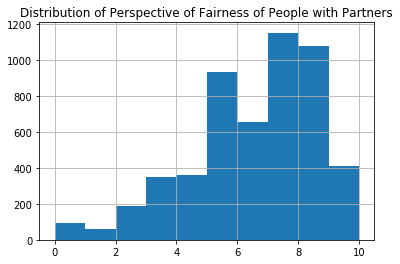

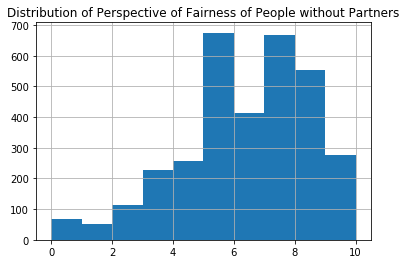

In [117]:
partners_pplfair.hist()
plt.title('Distribution of Perspective of Fairness of People with Partners')
plt.show()

no_partners_pplfair.hist()
plt.title('Distribution of Perspective of Fairness of People without Partners')
plt.show()

Both sets of data are quite skewed to the left. These are two independent groups, so I will utilize non-parametric tests, Moody's Median Test and the Mann-Whitney U.

In [118]:
partners_pplfair = partners_pplfair.tolist()
no_partners_pplfair = no_partners_pplfair.tolist()

print('Average Rating of Fairness for People with Partners:', sum(partners_pplfair)/len(partners_pplfair))
print('Average Rating of Fairness for People without Partners:', sum(no_partners_pplfair)/len(no_partners_pplfair))

print('\nMood\'s Median Test: ', stats.median_test(partners_pplfair, no_partners_pplfair))
stats.mannwhitneyu(partners_pplfair, no_partners_pplfair)

Average Rating of Fairness for People with Partners: 6.063701181624142
Average Rating of Fairness for People without Partners: 5.911877614969234

Mood's Median Test:  (15.189533569289047, 9.724089842863612e-05, 6.0, array([[2654, 1517],
       [2622, 1784]], dtype=int64))


MannwhitneyuResult(statistic=8299244.5, pvalue=0.00010298285775000211)

The test statistic is high and the p-value is just under 0.0003, indicating there's a 0.03% chance for the difference in means if there was no difference between the groups.





## 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [24]:
year_2014 = ess[ess['year'] == 7]
countries = ['SE', 'ES', 'DE', 'CZ']
year_2014_countries = year_2014[year_2014.cntry.isin(countries)]
year_2014_countries.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0


In [25]:
se = year_2014_countries[year_2014_countries['cntry'] =='SE']
se_sclmeet = se.sclmeet
se_sclmeet_list = se_sclmeet.tolist()

es = year_2014_countries[year_2014_countries['cntry'] =='ES']
es_sclmeet = es.sclmeet
es_sclmeet_list = es_sclmeet.tolist()

de = year_2014_countries[year_2014_countries['cntry'] =='DE']
de_sclmeet = de.sclmeet
de_sclmeet_list = de_sclmeet.tolist()

cz = year_2014_countries[year_2014_countries['cntry'] =='CZ']
cz_sclmeet = cz.sclmeet
cz_sclmeet_list = cz_sclmeet.tolist()

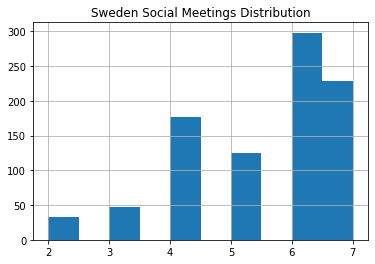

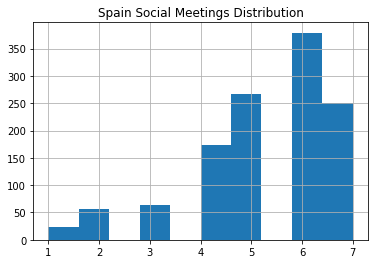

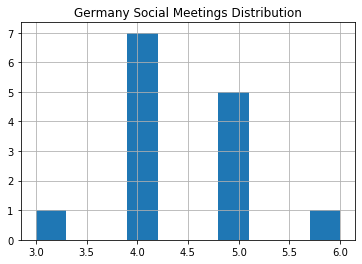

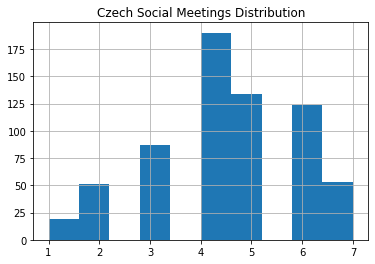

In [26]:
se_sclmeet.hist()
plt.title('Sweden Social Meetings Distribution')
plt.show()

es_sclmeet.hist()
plt.title('Spain Social Meetings Distribution')
plt.show()

de_sclmeet.hist()
plt.title('Germany Social Meetings Distribution')
plt.show()

cz_sclmeet.hist()
plt.title('Czech Social Meetings Distribution')
plt.show()

Definitely no distributions with mathematical properties, so I'll use Mood's Median test to compare the groups.

In [125]:
sclmeet_df = pd.DataFrame()

ranks = stats.rankdata(se_sclmeet_list + es_sclmeet_list + de_sclmeet_list + cz_sclmeet_list)
print('Average Social Meetings for Sweden: ', (sum(se_sclmeet_list)/len(se_sclmeet_list)))
print('Average Social Meetings for Spain: ', (sum(es_sclmeet_list)/len(es_sclmeet_list)))
print('Average Social Meetings for Germany: ', (sum(de_sclmeet_list)/len(de_sclmeet_list)))
print('Average Social Meetings for Czech Republic: ', (sum(cz_sclmeet_list)/len(cz_sclmeet_list)))


stats.median_test(se_sclmeet_list, es_sclmeet_list, de_sclmeet_list, cz_sclmeet_list)

Average Social Meetings for Sweden:  5.426211453744493
Average Social Meetings for Spain:  5.260004226275035
Average Social Meetings for Germany:  4.428571428571429
Average Social Meetings for Czech Republic:  4.449206215360829


(166.24815475981757, 8.214469362758782e-36, 5.0, array([[527, 631,   1, 180],
        [381, 582,  13, 478]], dtype=int64))

While I'd like to use Tukey's HSD to show a comparison table, my understanding is that all groups need to be equal sizes.

In [134]:
print(year_2014_countries.cntry.value_counts())

ES    1213
SE     908
CZ     658
DE      14
Name: cntry, dtype: int64


In [27]:
print('Stats Tests Between Germany and Czech Republic:\n')
print('\nMood\'s Median Test: ', stats.median_test(de_sclmeet_list, cz_sclmeet_list))

stats.mannwhitneyu(de_sclmeet_list, cz_sclmeet_list)

Stats Tests Between Germany and Czech Republic:


Mood's Median Test:  (0.003176316777097285, 0.9550559603549307, 4.0, array([[  6, 311],
       [  8, 347]], dtype=int64))


MannwhitneyuResult(statistic=4483.0, pvalue=0.43084410418984737)

In [28]:
print('Stats Tests Between Spain and Sweden:\n')
print('\nMood\'s Median Test: ', stats.median_test(se_sclmeet_list, es_sclmeet_list))

stats.mannwhitneyu(se_sclmeet_list, es_sclmeet_list)

Stats Tests Between Spain and Sweden:


Mood's Median Test:  (6.051826198427396, 0.013891921873646297, 6.0, array([[229, 250],
       [679, 963]], dtype=int64))


MannwhitneyuResult(statistic=518030.0, pvalue=0.008017007567433962)

There are definitely differences - the only pair without a significant difference is Germany and Czech Republic. All other countries are significantly different in the number of social meetings.

## 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [51]:
year_2014_countries.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
2204,CZ,1001.0,7,5.0,3.0,3.0,2.0,7.0,4.0,4.0,2.0,71.0,2.0
2205,CZ,1002.0,7,5.0,5.0,7.0,3.0,5.0,5.0,1.0,2.0,52.0,1.0
2206,CZ,1003.0,7,7.0,5.0,4.0,3.0,6.0,4.0,3.0,1.0,55.0,2.0
2207,CZ,1004.0,7,7.0,5.0,5.0,3.0,7.0,4.0,3.0,1.0,64.0,1.0
2208,CZ,1005.0,7,3.0,4.0,5.0,5.0,6.0,5.0,3.0,1.0,59.0,1.0


In [52]:
se = year_2014_countries[year_2014_countries['cntry'] =='SE']
se_sclmeet = se.sclmeet
se_sclmeet_list = se_sclmeet.tolist()

es = year_2014_countries[year_2014_countries['cntry'] =='ES']
es_sclmeet = es.sclmeet
es_sclmeet_list = es_sclmeet.tolist()

cz = year_2014_countries[year_2014_countries['cntry'] =='CZ']
cz_sclmeet = cz.sclmeet
cz_sclmeet_list = cz_sclmeet.tolist()

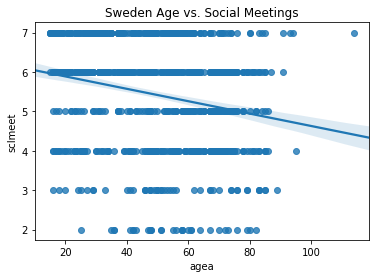

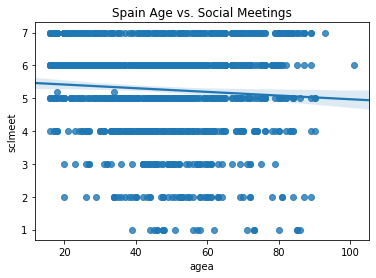

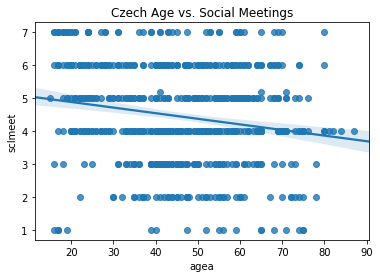

In [58]:
sns.regplot(x='agea', y='sclmeet', data=se)
plt.title('Sweden Age vs. Social Meetings')
plt.show()

sns.regplot(x='agea', y='sclmeet', data=es)
plt.title('Spain Age vs. Social Meetings')
plt.show()

sns.regplot(x='agea', y='sclmeet', data=cz)
plt.title('Czech Age vs. Social Meetings')
plt.show()

In [61]:
sclmeet = year_2014_countries[['cntry', 'agea', 'sclmeet']]
sclmeet = pd.concat([sclmeet, pd.get_dummies(sclmeet['sclmeet'])], axis=1)